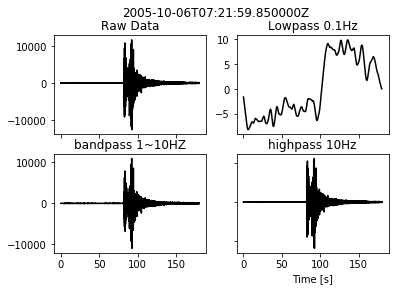

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import obspy

# Read the seismogram
st = obspy.read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")

# There is only one trace in the Stream object, let's work on that trace...
tr = st[0]

# Filtering with a lowpass on a copy of the original Trace
tr_filt = tr.copy()
tr_filt.filter('lowpass', freq=0.1, corners=2, zerophase=True)

# Filtering with a bandpass on a copy of the original Trace
tr_filt2 = tr.copy()
tr_filt2.filter('bandpass', freqmin=1.0, freqmax=10, corners=2, zerophase=True)

# Filtering with a highpass on a copy of the original Trace
tr_filt3 = tr.copy()
tr_filt3.filter('highpass', freq=1, corners=2, zerophase=True)


# Now let's plot the raw and filtered data...
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)

p1=plt.subplot(221)
plt.plot(t, tr.data, 'k')
p1.set_title('Raw Data')
plt.setp(plt.gca(), xticklabels=[])

p2=plt.subplot(222)
plt.plot(t, tr_filt.data, 'k')
p2.set_title('Lowpass 0.1Hz')
plt.setp(plt.gca(), xticklabels=[])

p3=plt.subplot(223)
plt.plot(t, tr_filt2.data, 'k')
p3.set_title('bandpass 1~10HZ')

p4=plt.subplot(224)
plt.plot(t, tr_filt3.data, 'k')
p4.set_title('highpass 10Hz')
plt.setp(plt.gca(), yticklabels=[])

plt.xlabel('Time [s]')
plt.suptitle(tr.stats.starttime)
plt.show()